# REDES NEURAIS

Este notebook aborda os algoritmos de redes neurais do capítulo 18 do livro *Inteligência Artificial: Uma Abordagem Moderna*, de Stuart Russel e Peter Norvig. 



## 1. Introdução

### 1.1 Motivação Biológica, o Perceptron e Funções de Ativação Típicas

A origem das *redes neurais artificiais* (ANNs) remonta aos anos 1940. A forma mais simples de uma ANN é o *perceptron*, desenvolvido por Frank Rosenblatt em 1957 (os leitores interessados podem acessar o relatório original [aqui](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)), sendo este inspirado na biologia (veja o esboço simplificado de um neurônio biológico abaixo).

Em um perceptron, a saída \( y \) é calculada ao tomar a combinação linear das entradas com os pesos \( w_1, w_2 \) e o *bias* \( b \), resultando no valor \( z \) (veja a parte direita da figura abaixo), ao qual uma função não linear \( f \) (a *função de ativação*) é aplicada ao final. 



<img src="./assets/nn_regression/biological_neuron_analogy.png" width="700">

Como primeiro exemplo, consideremos a classificação binária, ou seja, duas classes (representadas por círculos e cruzes na parte direita da figura abaixo), que tentamos distinguir usando duas características de entrada $ x_1, x_2 $. Este cenário pode ser, por exemplo, um problema médico, onde queremos prever se um paciente possui uma determinada doença com base em dois fatores (por exemplo, idade e altura). Uma forma muito simples de função de ativação é a função de ativação Heaviside, para a qual o perceptron gera a seguinte saída:

$ y= f(z)=
  \begin{cases}
   1 \quad \text{if } z = w_1x_1+w_2x_2+b > 0 \\
   0 \quad \text{otherwise.}
  \end{cases}
$

Aqui, os dois possíveis valores $ 0 $ e $ 1 $ representam as duas classes distintas. Dados pesos fixos $ w_1, w_2 $, o termo de *bias* $ b $ define quando o neurônio dispara (isto é, $ f(z) = 1 $) ou não, para as características de entrada $ x_1, x_2 $, que representam, por exemplo, um paciente.

<img src="./assets/nn_regression/perceptron_binary_classification.png" width="500">

Em geral, no aprendizado supervisionado, temos um conjunto de $ m $ exemplos de treinamento, que podem ser escritos como tuplas consistindo em características de entrada (neste exemplo resumidas em um vetor bidimensional $ \mathbf{x} $, com componentes $ x_1 $ e $ x_2 $) e os rótulos corretos $ y^{(i)} $, com $ i = 1, ..., m $:

$(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), ..., (\mathbf{x}^{(m)}, y^{(m)})$.


Os pesos e o termo de *bias* do modelo (neste caso: $ w_1, w_2, b $) são otimizados minimizando uma *função de perda* $ L(w_1, w_2, b) $, que quantifica como os valores previstos $ \hat{y}^{(i)} $ se desviam dos valores reais $ y^{(i)} $ - como uma função dos parâmetros do modelo. Normalmente, o gradiente descendente é usado para encontrar os parâmetros que minimizam $ L $ (com modificações no gradiente descendente permitindo, por exemplo, uma convergência mais rápida - veja os capítulos 5 e 8 desta [referência](https://www.deeplearningbook.org/)). Após finalizar a otimização, no caso de classificação, o desempenho do modelo pode ser avaliado por meio da precisão de classificação (número de previsões corretas dividido pelo número total de previsões).

Neste exemplo, pode-se pensar na fase de treinamento / otimização como a modificação dos parâmetros do modelo de forma que a posição ideal de uma linha reta (veja a figura acima, à direita) seja encontrada, servindo como uma fronteira de decisão entre as duas classes.

Para concluir esta seção sobre perceptrons, observe que a função de ativação Heaviside não é utilizada em aplicações modernas de aprendizado profundo. Em vez disso, são utilizadas as seguintes funções:

- **Sigmoide:**  
$
f(x) = \frac{1}{1 + \exp{(-x)}}
$

- **Tangente hiperbólica:**  
$
f(x) = \tanh{(x)} = \frac{\sinh{(x)}}{\cosh{(x)}} = \frac{\exp{(x)} - \exp{(-x)}}{\exp{(x)} + \exp{(-x)}}
$

- **Unidade linear retificada (ReLU):**  
$
f(x) = \max(0, x)
$

A função de ativação ReLU é a mais frequentemente utilizada. Vale ressaltar que o uso de funções não lineares é essencial: se nenhuma função de ativação fosse utilizada, ou seja, apenas a identidade - também chamada de *função de ativação linear* - a classe de funções que o modelo poderia representar seria drasticamente reduzida.

![activation_functions.png](./assets/nn_regression/activation_functions.png)

### 1.2 Perceptron Multicamadas (Multilayer peceptron)

Expandindo a ideia de perceptrons simples, é possível construir perceptrons multicamadas como uma sequência de camadas.  
Cada camada consiste em um número pré-definido de neurônios, onde os neurônios da primeira camada (a *camada de entrada*) correspondem às características de entrada $\mathbf{x} = (x_1, x_2, ...) $. As camadas subsequentes são chamadas de *camadas ocultas*. Os neurônios individuais em cada camada oculta são uma combinação linear dos neurônios da camada anterior. Por exemplo, o *valor de ativação* $a_1 $ destacado na figura abaixo é calculado da seguinte forma:

$
a_1 = f(w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 + w_6 x_6 + b_1),
$

onde uma função de ativação $f $ é aplicada para gerar o valor de ativação final. Esse processo, chamado de *propagação para frente* (*forward propagation*), é repetido para todos os neurônios e camadas até que a saída $\textbf{o} = (o_1, o_2, ...) $ na *camada de saída* seja obtida. Já nesse nível, uma das principais características das redes neurais (multicamadas) se torna evidente — a capacidade de aprender recursos complexos a partir da entrada inicial. Essa habilidade de aprender novas representações que se tornam mais abstratas conforme a profundidade da rede (isto é, quanto mais camadas ocultas ela possui) distingue as redes neurais de outros algoritmos de aprendizado de máquina "padrão" (por exemplo, árvores de decisão). 

Vale observar que a arquitetura mostrada na figura abaixo possui apenas uma camada oculta (uma *rede neural rasa*), enquanto modelos modernos de aprendizado profundo podem alcançar mais de 50 camadas (veja, por exemplo, [aqui](http://openaccess.thecvf.com/content_cvpr_2016/html/He_Deep_Residual_Learning_CVPR_2016_paper.html)).

<img src="./assets/nn_regression/mlp_example.png" width="500">

De forma mais formal, dada uma entrada vetorial $\mathbf{x} = (x_1, x_2, ...)^T $, as ativações $\mathbf{a} = (a_1, a_2, ...)^T $ da próxima camada são obtidas pela transformação:

$
\mathbf{a} = f ( A\mathbf{x} + \mathbf{b} ),
$

que é essencialmente uma transformação afim (definida por uma matriz $A $ e um vetor $\mathbf{b} $) seguida pela aplicação elemento a elemento da função de ativação (não linear) $f $. Os pesos das combinações lineares são organizados na matriz $A $ e os deslocamentos no *vetor de bias* $\mathbf{b} = (b_1, b_2, ...) $. As ativações de saída $\mathbf{o} $ são obtidas aplicando uma outra transformação afim (matriz $A^\prime $, bias $\mathbf{b}^\prime $) e uma função de ativação $f^\prime $:

$
\mathbf{o} = f^\prime (A^\prime \mathbf{a} + \mathbf{b}^\prime).
$

A função de ativação final $f^\prime $ é escolhida de acordo com a tarefa, geralmente dependendo se é um problema de regressão ou classificação — voltaremos a isso mais tarde.

Para simplificar a expressão acima para $\mathbf{o} $, é comum modificar a definição do vetor de entrada e das matrizes de peso para que os termos de bias possam ser omitidos. Para ilustrar isso, considere o caso simplificado de duas características de entrada e duas ativações $a_1 = w_{11}x_1 + w_{12}x_2 + b_1 $ e $a_2 = w_{21}x_1 + w_{22}x_2 + b_2 $. Assim, $A $ e $\mathbf{b} $ são definidos como:

$
A = \begin{bmatrix}w_{11} & w_{12}\\w_{21} & w_{22}\end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix}b_1 \\ b_2 \end{bmatrix}.
$

Introduzindo as novas definições:

$
W = \begin{bmatrix} b_1 & w_{11} & w_{12}\\ b_2 & w_{21} & w_{22}\end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix} 1 \\ x_1 \\ x_2 \end{bmatrix},
$

permite omitir o termo de bias e substituir $A\mathbf{x}+\mathbf{b} $ por $W\mathbf{x} $. Voltando ao exemplo anterior, introduzimos as matrizes de peso $W $ e $W^\prime $, o que gera uma expressão mais compacta para a saída:

$
\mathbf{o} = f^\prime (W^\prime \mathbf{a}) = f^\prime (W^\prime f(W \mathbf{x})).
$

Essa equação torna mais claro que um perceptron multicamadas é uma concatenação de transformações afins e não lineares, parametrizadas por um conjunto de pesos e bias que são otimizados para se ajustar à tarefa em questão. Essa equação pode ser generalizada para um número arbitrário de camadas $N $:

$
\mathbf{o} = f^{N} ( W^N f^{N-1} ( W^{N-1} ... f^1 ( W^1 \mathbf{x}) ).
$

Um exemplo para o caso $N = 3 $ é mostrado na figura a seguir:

<img src="./assets/nn_regression/mlp_more_layers_example.png" width="200">

Quanto maior e mais profunda a rede, mais custoso computacionalmente se torna calcular o gradiente da função de perda (necessário para otimizar os parâmetros via gradiente descendente). Uma invenção chave é o algoritmo de retropropagação ([publicação original](https://www.nature.com/articles/323533a0)), que é uma forma eficiente de calcular o gradiente da função de perda em relação aos parâmetros da rede neural.

Observe que, se usássemos apenas funções de ativação lineares (isto é, identidade), a saída seria essencialmente apenas uma combinação linear da entrada. O uso de funções de ativação não lineares (hoje em dia, principalmente a ReLU) enriquece o espaço de funções que podem ser representadas. Em particular, o teorema da aproximação universal (veja [capítulo 6.4.1](https://www.deeplearningbook.org/) e referências nele) garante que perceptrons multicamadas podem aproximar qualquer função contínua — embora este teorema não forneça detalhes sobre a arquitetura ou garantias de generalização. Devido ao uso de não linearidades, otimizar uma rede neural profunda é um problema de otimização não convexa com múltiplos mínimos locais. Técnicas como o gradiente descendente estocástico (veja [capítulo 8](https://www.deeplearningbook.org/)) ajudam a evitar ficar preso em mínimos locais não ótimos.

Por fim, quanto à escolha da função de ativação na última camada, a função de ativação softmax é a escolha usual para tarefas de classificação, resultando na seguinte expressão para o $j $-ésimo componente do vetor de saída:

$
[\mathbf{o}]_j = [f(\mathbf{x})]_j = \frac{\exp{\left([\mathbf{x}]_j\right)}}{\sum_k \exp{\left([\mathbf{x}]_k\right)}}.
$

Dessa forma, os componentes do vetor de saída são normalizados para o intervalo $[0, 1] $ e somam um, ou seja, os componentes podem ser interpretados como probabilidades.

Para ilustrar a utilidade das funções de ativação softmax, considere o caso de classificação de estruturas cristalinas. A tarefa consiste em atribuir o rótulo correto de simetria a uma estrutura cristalina desconhecida, definida por posições atômicas e espécies químicas. Por exemplo, atribuições possíveis poderiam ser: cúbico de face centrada (*face-centered cubic* - fcc), cúbico de corpo centrado (*body-centered cubic* - bcc), diamante ou hexagonal compactado (*hexagonal close-packed* - hcp) — uma coleção de estruturas que cobre mais de 80% dos sólidos elementares. Explicações mais detalhadas sobre o aprendizado profundo aplicado à classificação de estruturas cristalinas podem ser encontradas [aqui](https://www.nature.com/articles/s41467-018-05169-6).

Ao aplicar a arquitetura de perceptron multicamadas que introduzimos acima, cada um dos quatro neurônios de saída corresponde a uma estrutura cristalina específica. O uso da função de ativação softmax garante que todas as ativações de saída somem um, razão pela qual o vetor de saída $\mathbf{o} $ pode ser considerado como um vetor de probabilidades de classificação. Por exemplo, se $\mathbf{o} = (1, 0, 0, 0) $, a estrutura de entrada é prevista como tendo simetria fcc com 100% de probabilidade (veja a figura abaixo). Esse processo é também chamado de *one-hot encoding* e corresponde a representar um número $N $ de classes na base padrão de $\mathbb{R}^N $, ou seja, por $N $ vetores $e_i = (0, ..., 0, 1, 0, ..., 0) $, para $i = 1, ..., N $, com todos os componentes de $e_i $ sendo zero, exceto o $i $-ésimo elemento.


<img src="./assets/nn_regression/cs_classification_first_example.png" width="1700">

Para regressão, a arquitetura de rede multicamada apresentada acima pode ser facilmente adaptada — utilizando apenas um neurônio na camada de saída juntamente com uma função de ativação *linear* (isto é, a função identidade) para prever uma propriedade-alvo específica $\text{P} \in \mathbb{R} $. Uma arquitetura semelhante (com camadas ocultas adicionais) será utilizada neste tutorial, e a propriedade-alvo será preço dos imóveis de SP.

<img src="./assets/nn_regression/regression_first_example.png" width="350">

## BACKPROPAGATION

### Visão Geral

Tanto no Perceptron quanto na Rede Neural, utilizamos o algoritmo de Retropropagação (*Backpropagation*) para treinar nosso modelo atualizando os pesos. Isso é feito propagando os erros da última camada (camada de saída) de volta para a primeira camada (camada de entrada), razão pela qual o método é chamado de Retropropagação. Para utilizar a Retropropagação, precisamos de uma função de custo. Essa função é responsável por indicar o quão boa é a rede neural para um determinado exemplo. Uma função de custo comum é o *Erro Quadrático Médio* (*Mean Squared Error* - MSE). A função de custo tem o seguinte formato:

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y})^{2}
$

Onde $n $ é o número de exemplos de treinamento, $\hat{y} $ é a previsão feita pela rede e $y $ é o valor correto para o exemplo.

O algoritmo combina os conceitos de derivadas parciais e a regra da cadeia para gerar o gradiente de cada peso na rede com base na função de custo.

Por exemplo, se utilizarmos uma Rede Neural com três camadas, a função sigmoide como função de ativação e o MSE como função de custo, e quisermos encontrar o gradiente de um peso $w_{j} $, podemos calculá-lo assim:

$
\frac{\partial MSE(\hat{y}, y)}{\partial w_{j}} = \frac{\partial MSE(\hat{y}, y)}{\partial \hat{y}} \times \frac{\partial \hat{y}(in_{j})}{\partial in_{j}} \times \frac{\partial in_{j}}{\partial w_{j}}
$

Resolvendo esta equação, temos:

$
\frac{\partial MSE(\hat{y}, y)}{\partial w_{j}} = (\hat{y} - y) \times \hat{y}'(in_{j}) \times a_{j}
$

Lembre-se de que $\hat{y} $ é a função de ativação aplicada a um neurônio em nossa camada oculta, portanto:

$
\hat{y} = sigmoid\left(\sum_{i=1}^{num\_neurons} w_{i} \times a_{i}\right)
$

Além disso, $a $ é a entrada gerada ao alimentar as variáveis da camada de entrada na camada oculta.

Podemos usar a mesma técnica para calcular os gradientes dos pesos na camada de entrada. Após calcular os gradientes para os pesos, utilizamos o gradiente descendente para atualizar os pesos da rede.

## NEURAL NETWORK ALGORITHM

### Visão Geral

Embora o Perceptron possa parecer uma boa maneira de realizar classificações, ele é um classificador linear (o que, grosso modo, significa que só pode traçar linhas retas para dividir espaços) e, portanto, pode enfrentar dificuldades com problemas mais complexos. Para resolver esse problema, podemos estender o Perceptron empregando múltiplas camadas de sua funcionalidade. O resultado dessa construção é chamado de Rede Neural, ou Perceptron Multicamadas, e é um classificador não linear. Ele alcança isso combinando os resultados de funções lineares em cada camada da rede.

Semelhante ao Perceptron, essa rede também possui uma camada de entrada e uma camada de saída; no entanto, ela também pode conter várias camadas ocultas. Essas camadas ocultas são responsáveis pela não linearidade da rede. As camadas são compostas por nós. Cada nó em uma camada (exceto na camada de entrada) contém alguns valores chamados *pesos* e recebe como entrada os valores de saída da camada anterior. O nó, então, calcula o produto escalar de suas entradas e seus pesos, ativando-o em seguida com uma *função de ativação* (por exemplo, função de ativação sigmoide). Sua saída é então enviada para os nós da próxima camada. Vale notar que, às vezes, a camada de saída não utiliza uma função de ativação ou utiliza uma diferente do restante da rede. O processo de passar as saídas para frente entre as camadas é chamado de *feed-forward*.

Depois que os valores de entrada são passados adiante na rede, a saída resultante pode ser usada para classificação. O problema agora é como treinar a rede (isto é, ajustar os pesos nos nós). Para isso, utilizamos o algoritmo de *Retropropagação* (*Backpropagation*). Em resumo, ele faz o oposto do que estávamos fazendo até este ponto. Em vez de passar as entradas para frente, ele rastreia o erro de trás para frente. Assim, após realizarmos uma classificação, verificamos se está correta ou não e quão distante estávamos. Em seguida, pegamos esse erro e o propagamos para trás na rede, ajustando os pesos dos nós conforme necessário. O algoritmo será executado no conjunto de dados de entrada por um tempo fixo ou até que fiquemos satisfeitos com os resultados. O número de vezes que iteramos sobre o conjunto de dados é chamado de *épocas* (*epochs*). Em uma seção posterior, analisamos detalhadamente como esse algoritmo funciona.

**NOTA:** Às vezes, adicionamos outro nó à entrada de cada camada, chamado de *bias*. Este é um valor constante que será enviado para a próxima camada, geralmente configurado como 1. O *bias* geralmente nos ajuda a "deslocar" a função calculada para a esquerda ou para a direita.

![neural_net](images/neural_net.png)

## Implementação



### Importar Bibliotecas Necessárias:



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Carregar e Pré-processar os Dados:



In [26]:
# Carregar o dataset
df = pd.read_csv('./data/sao-paulo-properties-april-2019.csv')

# Selecionar as colunas relevantes
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']
target = 'Price'

# Remover linhas com valores faltantes
#df = df.dropna(subset=features + [target])
# Separar features e target
X = df.drop(target, axis=1)
y = df[target]
# Converter variáveis categóricas em dummy/indicator variables
X = pd.get_dummies(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Construir e Treinar o Modelo



In [33]:
# Inicializar o MLPRegressor
model = MLPRegressor(
    hidden_layer_sizes=(120, 120),  # Duas camadas ocultas com 64 e 32 neurônios
    activation='relu',            # Função de ativação ReLU
    solver='adam',                # Otimizador Adam
    max_iter=1000,                 # Número máximo de iterações
    random_state=42,
    learning_rate = 'adaptive'
)

# Treinar o modelo
model.fit(X_train, y_train)

/home/eltonss/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(120, 120), learning_rate='adaptive',
             max_iter=1000, random_state=42)

### Avaliar o Modelo

In [34]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 27424769484.08344
R² Score: 0.9198933195826221


### Visualizar Resultados

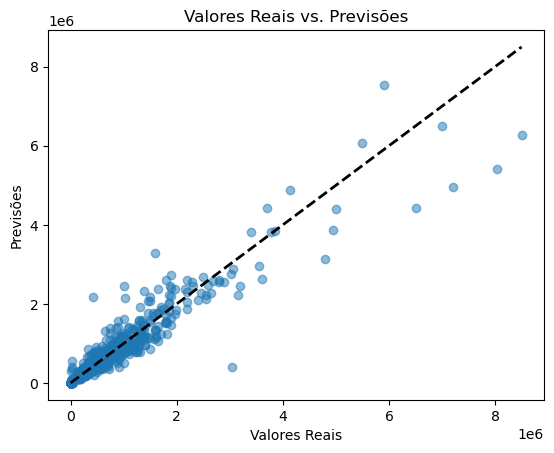

In [35]:
import matplotlib.pyplot as plt

# Plotar valores reais vs. previsões
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

## Rede Neural Multicamada usando Keras

### Importar Bibliotecas Necessárias

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Carregar e Pré-processar os Dados

In [51]:
# Carregar o dataset
df = pd.read_csv('./data/sao-paulo-properties-april-2019.csv')

# Selecionar as colunas relevantes
features = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']
target = 'Price'

# Remover linhas com valores faltantes
#df = df.dropna(subset=features + [target])
# Separar features e target
X = df.drop(target, axis=1)
y = df[target]
# Converter variáveis categóricas em dummy/indicator variables
X = pd.get_dummies(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)

(10912, 111)


### Construir a Rede Neural

In [62]:
# Inicializar a rede neural
model = Sequential()

# Adicionar a primeira camada oculta
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Adicionar a segunda camada oculta
model.add(Dense(units=32, activation='relu'))

# Adicionar a camada de saída
model.add(Dense(units=1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/home/eltonss/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Treinar a Rede Neural

In [ ]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 436536934400.0000 - val_loss: 422864322560.0000
Epoch 2/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 425062236160.0000 - val_loss: 410540212224.0000
Epoch 3/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 377962463232.0000 - val_loss: 380686499840.0000
Epoch 4/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 355247882240.0000 - val_loss: 336212525056.0000
Epoch 5/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 275844726784.0000 - val_loss: 287794233344.0000
Epoch 6/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261846958080.0000 - val_loss: 246780641280.0000
Epoch 7/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201295462400.0000 - val_loss: 218563559424.0000
Epoch 8/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 237722238976.0000 - val_loss: 200723447808.0000
Epoch 9/150
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178955272192.0000 - val_loss: 188282404864.0000
Epoch 10/150
273/

### Avaliar o Modelo

#### Explicação das Métricas utilizadas para regressão:

1. **Mean Squared Error (MSE):**
   - Mede o erro médio quadrático entre os valores reais e as previsões.
   - Quanto menor o MSE, melhor o modelo.
   - Fórmula:
     $
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     $

2. **Mean Absolute Error (MAE):**
   - Mede o erro médio absoluto entre os valores reais e as previsões.
   - É menos sensível a outliers do que o MSE.
   - Fórmula:
     $
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     $

3. **R² Score (Coeficiente de Determinação):**
   - Mede o quanto o modelo explica a variância dos dados.
   - Varia de 0 a 1. Quanto mais próximo de 1, melhor o modelo.
   - Fórmula:
     $
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
     $

In [60]:
# Avaliar o modelo no conjunto de teste
loss = model.evaluate(X_test, y_test)
print(f'Loss no conjunto de teste: {loss}')

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61503418368.0000  
Loss no conjunto de teste: 51756130304.0
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
Mean Squared Error (MSE): 51756130585.65178
Mean Absolute Error (MAE): 68907.99007185323
R² Score: 0.8488223552703857


### Visualizar Resultados

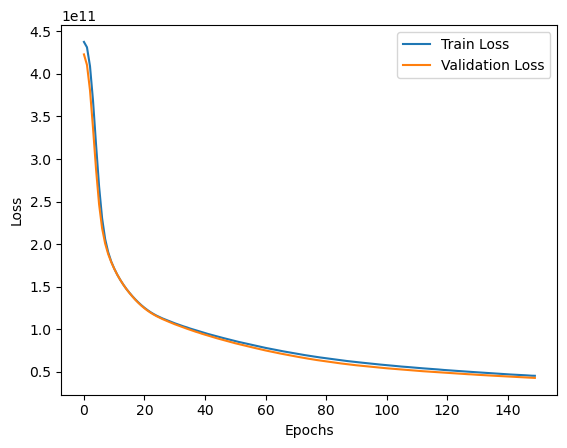

In [61]:
import matplotlib.pyplot as plt

# Plotar a perda durante o treinamento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Redes Neurais para Classificação

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Carregar o dataset
df = pd.read_csv("./aima-data/zoo.csv", sep=',')

# 2. Pré-processamento dos dados
# Separar características e rótulo
X = df.drop(['animal_name', 'type'], axis=1)
y = df['type']

# Converter rótulos para valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalizar as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# 4. Construir a rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Treinar a rede neural
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# 6. Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50


/home/eltonss/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2016 - loss: 2.0399 - val_accuracy: 0.3125 - val_loss: 1.7234
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2114 - loss: 1.9199 - val_accuracy: 0.5625 - val_loss: 1.5453
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3483 - loss: 1.6143 - val_accuracy: 0.5625 - val_loss: 1.3856
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4239 - loss: 1.5159 - val_accuracy: 0.6875 - val_loss: 1.2371
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6544 - loss: 1.2877 - val_accuracy: 0.8125 - val_loss: 1.0921
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 1.1765 - val_accuracy: 0.8125 - val_loss: 0.9629
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7971 - loss: 0.9675 - val_accuracy: 0.8125 - val_loss: 0.8435
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.8903 - val_accuracy: 0.8750 - val_loss: 0.7268
Epoch 9/50
8/8 ━━━

### Predição

In [ ]:
import numpy as np

# 1. Preparar os dados de entrada
# Exemplo: Características de um animal (sem o nome e o tipo)
# Vamos usar um exemplo de um mamífero (por exemplo, um lobo)
# [hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]
input_data = np.array([[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1]])  # Características de um lobo

# Normalizar os dados de entrada (usando o mesmo scaler que foi usado no treino)
input_data_scaled = scaler.transform(input_data)

# 2. Fazer a predição
prediction = model.predict(input_data_scaled)
print(prediction)
# 3. Interpretar o resultado
# A saída é uma matriz de probabilidades para cada classe
predicted_class_index = np.argmax(prediction, axis=1)  # Encontra o índice da classe com maior probabilidade
predicted_class = label_encoder.inverse_transform(predicted_class_index)  # Converte o índice de volta para o rótulo original

print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[4.7204547e-05 2.8098890e-04 2.1764314e-05 2.5710084e-05 9.9891639e-01
  4.2106851e-04 2.8692957e-04]]
[4]
Predicted class: mammal


/home/eltonss/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### PROBABILIDADE POR CLASSE

In [67]:
import numpy as np

# 1. Preparar os dados de entrada
# Exemplo: Características de um animal (sem o nome e o tipo)
# Vamos usar um exemplo de um mamífero (por exemplo, um lobo)
# [hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]
input_data = np.array([[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1]])  # Características de um lobo

# Normalizar os dados de entrada (usando o mesmo scaler que foi usado no treino)
input_data_scaled = scaler.transform(input_data)

# 2. Fazer a predição
prediction = model.predict(input_data_scaled)

# 3. Exibir as probabilidades de cada classe
# A saída é uma matriz de probabilidades para cada classe
print("Probabilidades de cada classe:")
for i, prob in enumerate(prediction[0]):
    class_name = label_encoder.inverse_transform([i])[0]  # Converte o índice de volta para o nome da classe
    print(f"{class_name}: {prob:.4f}")

# 4. Interpretar o resultado
predicted_class_index = np.argmax(prediction, axis=1)  # Encontra o índice da classe com maior probabilidade
predicted_class = label_encoder.inverse_transform(predicted_class_index)  # Converte o índice de volta para o rótulo original

print(f"\nPredicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Probabilidades de cada classe:
amphibian: 0.0000
bird: 0.0003
fish: 0.0000
insect: 0.0000
mammal: 0.9989
reptile: 0.0004
shellfish: 0.0003

Predicted class: mammal


/home/eltonss/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
